In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Time Analysis

In [2]:
time_df = pd.read_csv("time_data.csv")

In [3]:
time_df.describe().drop("count")

,Original_AES_Encryption_Time,Original_AES_Decryption_Time,Josephus_AES_Encryption_Time,Josephus_AES_Decryption_Time,Modified_AES_Encryption_Time,Modified_AES_Decryption_Time
mean,0.004057,0.004360,0.001306,0.001122,0.001009,0.001038
std,0.000586,0.000688,0.000463,0.000358,0.000100,0.000241
min,0.002991,0.003957,0.000964,0.000966,0.000994,0.000990
25%,0.003988,0.003989,0.000997,0.000997,0.000997,0.000997
50%,0.003989,0.003990,0.000998,0.000998,0.000997,0.000997
75%,0.003991,0.004986,0.001993,0.000999,0.000998,0.000998
max,0.007946,0.008942,0.002029,0.003024,0.001995,0.002992


In [4]:
time_df.head(10)

,Original_AES_Encryption_Time,Original_AES_Decryption_Time,Josephus_AES_Encryption_Time,Josephus_AES_Decryption_Time,Modified_AES_Encryption_Time,Modified_AES_Decryption_Time
0,0.003989,0.003989,0.001995,0.000997,0.000997,0.000998
1,0.003989,0.003989,0.001995,0.000997,0.000998,0.000997
2,0.003989,0.003989,0.000998,0.000997,0.000997,0.000998
3,0.003989,0.003989,0.000997,0.001995,0.000997,0.000996
4,0.003990,0.003989,0.000997,0.000998,0.000997,0.000997
5,0.003989,0.003989,0.001995,0.000997,0.000998,0.000998
6,0.003989,0.003989,0.000997,0.000998,0.000998,0.000997
7,0.003989,0.003989,0.000997,0.000997,0.000998,0.000998
8,0.003989,0.004987,0.000997,0.000997,0.000997,0.000997
9,0.003989,0.004987,0.000998,0.000998,0.000997,0.000997


In [5]:
# time_df_mean = time_df.mean()
# plt.figure(figsize=(11,3))
# plt.bar(['Original AES Encryption Time', 
#          'Josephus AES Encryption Time', 
#          'Original AES Decryption Time', 
#          'Josephus AES Decryption Time'],
#         [time_df_mean['Original_AES_Encryption_Time']*1000,
#         time_df_mean['Josephus_AES_Encryption_Time']*1000,
#         time_df_mean['Original_AES_Decryption_Time']*1000,
#         time_df_mean['Josephus_AES_Decryption_Time']*1000]
#        ,color=['#5555FF','#FFAA00']*2
#        ,width=0.4)
# plt.ylabel('Millisecond')
# plt.title('Time used for encryption and decryption per state')
# plt.show()

#Fallback graph

In [6]:
time_df.mean()

Original_AES_Encryption_Time    0.004057
Original_AES_Decryption_Time    0.004360
Josephus_AES_Encryption_Time    0.001306
Josephus_AES_Decryption_Time    0.001122
Modified_AES_Encryption_Time    0.001009
Modified_AES_Decryption_Time    0.001038
dtype: float64

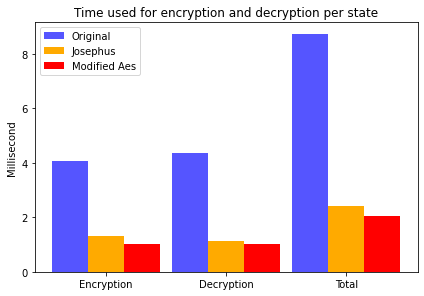

In [7]:
time_df_mean = time_df.mean()
labels = ["Encryption", "Decryption", "Total"]
bar_width = 0.3

fig, ax = plt.subplots()
x = np.arange(len(labels))

ax.bar(x - bar_width, 
       [time_df_mean['Original_AES_Encryption_Time']*1000,
        time_df_mean['Original_AES_Decryption_Time']*1000,
        (time_df_mean['Original_AES_Decryption_Time']+time_df_mean['Original_AES_Decryption_Time'])*1000
       ],
       bar_width, label='Original', color='#5555FF')
ax.bar(x,
       [time_df_mean['Josephus_AES_Encryption_Time']*1000,
        time_df_mean['Josephus_AES_Decryption_Time']*1000,
        (time_df_mean['Josephus_AES_Encryption_Time']+time_df_mean['Josephus_AES_Decryption_Time'])*1000
       ],
       bar_width, label='Josephus', color='#FFAA00')
ax.bar(x + bar_width,
       [time_df_mean['Modified_AES_Encryption_Time']*1000,
        time_df_mean['Modified_AES_Decryption_Time']*1000,
        (time_df_mean['Modified_AES_Encryption_Time']+time_df_mean['Modified_AES_Decryption_Time'])*1000
       ],
       bar_width, label='Modified Aes', color='#FF0000')


ax.set_ylabel('Millisecond')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.title('Time used for encryption and decryption per state')
plt.show()

# Avalanche Analysis

In [8]:
avalanche_df = pd.read_csv("avalanche_data.csv")
avalanche_df["Original_AES_Avalanche"] = avalanche_df["Original_AES_Avalanche"].astype(float)*100
avalanche_df["Josephus_AES_Avalanche"] = avalanche_df["Josephus_AES_Avalanche"].astype(float)*100
avalanche_df["Modified_AES_Avalanche"] = avalanche_df["Modified_AES_Avalanche"].astype(float)*100

In [9]:
avalanche_df[["Original_AES_Avalanche","Josephus_AES_Avalanche"]].describe().drop("count")

,Original_AES_Avalanche,Josephus_AES_Avalanche
mean,49.507812,50.726562
std,4.815507,4.247637
min,39.843750,39.843750
25%,46.093750,47.656250
50%,49.218750,50.781250
75%,53.125000,53.320312
max,59.375000,60.937500


In [10]:
avalanche_df.head(10)

,Plaintext_1,Plaintext_2,Original_AES_Ciphertext_1,Original_AES_Ciphertext_2,Original_AES_Avalanche,Josephus_AES_Ciphertext_1,Josephus_AES_Ciphertext_2,Josephus_AES_Avalanche,Modified_AES_Ciphertext_1,Modified_AES_Ciphertext_2,Modified_AES_Avalanche
0,?TMNA7LshHK&}F:q,?OMNA7LshHK&}F:q,9d0ed55800a497f87227d1475af35fb5,e82b6b24094c536af423b3a778a58e84,42.18750,08473bf289c9489ed3dea652e7063b56,113e0ed0865c6947dc3c915391353100,45.31250,6e18742f679595b63c2848ab01767660,6e5b742f679595b63c2848ab01767660,2.34375
1,FX[~LJEEY(Y/@N=),FX[~LJEEY(Y/mN=),b6b03141feb7e017c0b036f60595c250,47ba70504d0df13618ad016ca15e8dbc,46.87500,2e5d4f9c3ef8a1a28353dfb0ab97123b,b74164776416cf9abef60709a7136ad4,53.12500,7368c1532a4b833b842f5a217d2c2897,7368c1532a4b833b842f5a212b2c2897,3.12500
2,~UC7C7M)^hF_m}::,~UC7C7M)^UF_m}::,14ecf6cd48f7e7ebb8320cf9e361ab8f,6c88434f141a0a428031bc87458d79a7,49.21875,3e7523e94210f91d54923198e1d961f2,8c859655e777863d61d518083ac121b9,47.65625,25657f177895225bd6f325aa2b977617,25657f177895225bd69a25aa2b977617,3.12500
3,ypr:R&-f/+uB.w.M,ypr:R&Jf/+uB.w.M,37d5c68ecce1118b631cd2e6d436eb2f,cbdd54e8bcc83cb1cda88a4a1d24ee28,42.96875,1594f99f49d859cad32ae08a3d5c3df4,3e4ca1e23e7597b9292b394f5f58d045,53.12500,1aec82e899b6d4d8c20d69896b58983e,1aec82e899b646d8c20d69896b58983e,2.34375
4,h{5?Iw{HvdQu!6S~,*{5?Iw{HvdQu!6S~,0710826ac95d4e479df994c3776d1a13,0b232325be20b2bda521866360893b10,47.65625,fb377c005844466ee42a4edd6230c89d,a517196bf5539c8705690b9d54d2dd08,46.87500,1752382a093ab4ceb9d892d03de45f25,0b52382a093ab4ceb9d892d03de45f25,2.34375
5,"`dL,XD+t/cF+uPS6","`dL,XD+t/cF/uPS6",eaf8b670e2080264dd4e4a067d444591,51bf22f1a36985343bc08baf55887d71,42.18750,17f083abe0ac0161412a8712af6a68f5,8a7041092aa79b9f42fdda1276179a5e,50.00000,ae4b07560f4c3e41c2c12567c47c5fe6,ae4b07560f4c3e41c2c12521c47c5fe6,2.34375
6,SlL?U]K=64cb9K+y,SlL?U]K}64cb9K+y,ee6128e5fa6617422299210c2fcaa49f,dac1317e84e7d68d8e402339c7b124b9,45.31250,ef4b7eaeffeb472ad185948456eea833,d70103921c6c78d4a6e67e1541b85df1,57.03125,dfb0072a9a5e438040b4d5e07e19f2be,dfb0072a9a5e438840b4d5e07e19f2be,0.78125
7,#v$Pc$mRR4-N-@L\,"#v$Pc$mRR4-""-@L\",50c20c821f6b411bca90b5b517cca2a0,223e4659ee252262d5c21798f3b03429,53.12500,a10fedc7429da9d1d2fc9768fd51047d,c3637412704550e6e057d0616352bfae,51.56250,d7de527143d8081446b4dd3ac97e04f2,d7de527143d8081446b4dd66c97e04f2,3.12500
8,":j,<(=}@X""_JFL|j",":j,<(=}@X""_JFC|j",b0c9121cd708ad9e9ad7d674fa622c88,3aaaa3bfbd2281369f738fbdb89b2100,42.18750,47a6d01f8ae78f76b0d794a685b18922,40e50ed8d96a49420aa2f2671a71f567,50.78125,2eb31601efc787357063f373036395a8,2eb31601efc787357063f37303d695a8,3.90625
9,9hs*DqrQ>|+|s[XV,9hF*DqrQ>|+|s[XV,61dd622109686a805fc812e938e1c75a,e09aa20299197db97d27accd87ec3e67,49.21875,e9efe40d3d4cf5416f6e35f9d2e0f6b2,967ba4703aa393344171d9bd5552347f,53.12500,391e3fc29657f2816ffd1c23b6d05509,391e92c29657f2816ffd1c23b6d05509,3.90625


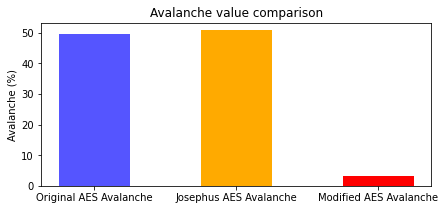

In [11]:
avalanche_df_mean = avalanche_df.mean()
plt.figure(figsize=(7,3))
plt.bar(['Original AES Avalanche', 
         'Josephus AES Avalanche',
         'Modified AES Avalanche'],
        [avalanche_df_mean['Original_AES_Avalanche'],
        avalanche_df_mean['Josephus_AES_Avalanche'],
        avalanche_df_mean['Modified_AES_Avalanche']]
       ,color=['#5555FF','#FFAA00','#FF0000']
       ,width=0.5)
plt.ylabel('Avalanche (%)')
plt.title('Avalanche value comparison')
plt.show()